In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

In [2]:
# #extract tweets from twitter
# import tweepy 
  
# consumer_key = "" 
# consumer_secret = ""
# access_key = ""
# access_secret = ""

          
# # Authorization to consumer key and consumer secret 
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

# # Access to user's access key and access secret 
# auth.set_access_token(access_key, access_secret) 

# # Calling api 
# api = tweepy.API(auth) 

# tweets = api.search(q="DelhiVoilence", lang="en", count=80)

# # Empty Array 
# tmp=[]  

# # create array of tweet information: username,  
# # tweet id, date/time, text 
# tweets_for_csv = [tweet.text for tweet in tweets] # CSV file created  
# for j in tweets_for_csv: 
#     # Appending tweets to the empty array tmp 
#     tmp.append(j)  

# # Printing the tweets
# org = tmp
# print(tmp) 

In [3]:
# #get random tweets from bbchealth file
# f = open('C:/Users/sumit/data/bbchealth.txt', "r", encoding="utf8")
# tweets = list(f)
# list_of_tweets = []

# for i in range(len(tweets)):

#     # remove \n from the end after every sentence
#     tweets[i] = tweets[i].strip('\n')

#     # Remove the tweet id and timestamp
#     tweets[i] = tweets[i][50:]

#     # Remove any word that starts with the symbol @
#     tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))

#     # Remove any URL
#     tweets[i] = re.sub(r"http\S+", "", tweets[i])
#     tweets[i] = re.sub(r"www\S+", "", tweets[i])

#     # remove colons from the end of the sentences (if any) after removing url
#     tweets[i] = tweets[i].strip()
#     tweet_len = len(tweets[i])
#     if tweet_len > 0:
#         if tweets[i][len(tweets[i]) - 1] == ':':
#             tweets[i] = tweets[i][:len(tweets[i]) - 1]

#     # Remove any hash-tags symbols
#     tweets[i] = tweets[i].replace('#', '')

#     # Convert every word to lowercase
#     tweets[i] = tweets[i].lower()

#     # remove punctuations
#     tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

#     # trim extra spaces
#     tweets[i] = " ".join(tweets[i].split())

#     # convert each tweet from string type to as list<string> using " " as a delimiter
#     list_of_tweets.append(tweets[i].split(' '))
    
# tweets_exp = list_of_tweets[:20]
# tweets_abs = list_of_tweets[:20]

In [12]:
import csv
import re
import string

with open('C:/Users/user/data/#worldbookday.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
    
tweets_exp = list_of_tweets[:500]
tweets_abs = list_of_tweets[:500]

In [2]:
print('found %d tweets' % len(list_of_tweets))

found 30370 tweets


In [3]:
#getting expression words from pwords and nwords file

f = open('C:/Users/user/data/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/user/data/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [15]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    
#joining the words again into sentences
# seperator = ' '
# for n,text in enumerate(tweets_abs):
#     tweets_abs[n] = seperator.join(text)

# for n,text in enumerate(tweets_exp):
#     tweets_exp[n] = seperator.join(text)

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [14]:
#working on abstraction score(tweets_abs)........................................................................

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 ...
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]
 [0.27798471 0.         0.         ... 0.         0.         0.27522416]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [22]:
vt_abs = Gabs.number_of_nodes()
Gabs.number_of_edges()

124750

In [11]:
#working on expression score(tweets_exp).....................................................................

In [12]:
#ignore
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
   
# # Create a SentimentIntensityAnalyzer object. 
# sid_obj = SentimentIntensityAnalyzer()
# score = []
# for text in org:
#     sentiment_dict = sid_obj.polarity_scores(text)
#     score.append(sentiment_dict['compound'])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [2]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
        #if  sc != 0:
#         Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [26]:
vt_exp = Gexp.number_of_nodes()
Gexp.number_of_edges()

122275

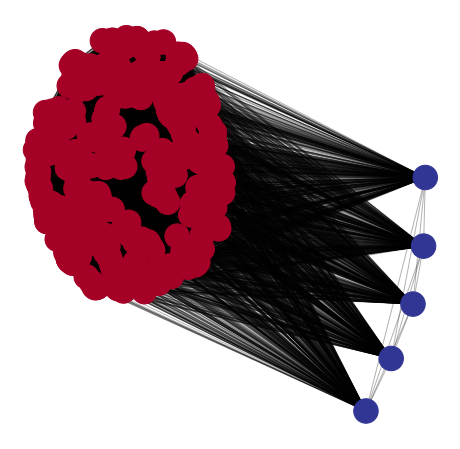

In [27]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

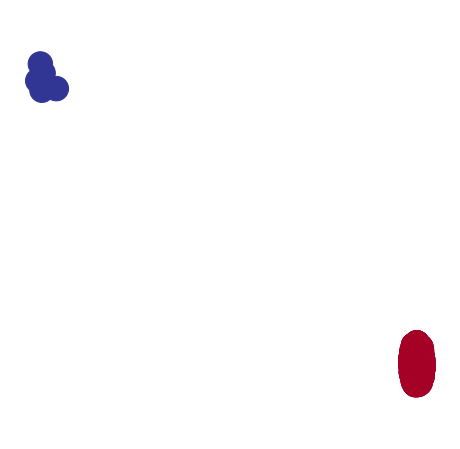

In [28]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [29]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({0: 495, 1: 5})
clusters in expression graph:  Counter({0: 495, 1: 5})


In [30]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [31]:
abs_score = float(v_abs/vt_abs)
abs_score

0.99

In [32]:
exp_score = float(v_exp/vt_exp)
exp_score

0.99

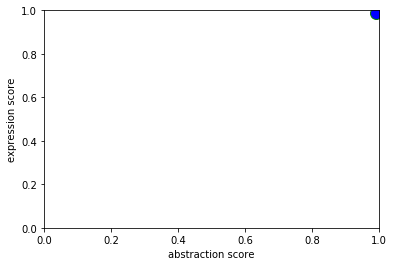

In [33]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()